In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pyalluvial.alluvial as alluvial
import numpy as np

# Datos Alluvial

In [2]:
dicc = {'positive regulation of cellular metabolic process': 'Regulación positiva de procesos metabolicos', 
        'positive regulation of metabolic process': 'Regulación positiva de procesos metabolicos', 
        'positive regulation of cell population proliferation': 'Regulación positiva de proliferación celular',
       'cell population proliferation': 'Regulación positiva de proliferación celular',
        'protein phosphorylation': 'Fosforilación de proteinas',
        'regulation of cell population proliferation':'Regulación positiva de proliferación celular',
        'tube development':'Desarrollo de tubo',
        'tube morphogenesis': 'Morfogénesis de tubo',
        'Phosphate−containing compound metabolic process': 'Fosforilación de proteinas',
        'epithelial cell proliferation': 'Proliferación de células epiteliales', 
        'phosphorylation': 'Fosforilación',
        'positive regulation of protein metabolic process': 'Regulación positiva del metabolismo de proteínas',
        'Regulation of nitrogen compound metabolic process':'Regulación del proceso metabólico de compuestos de nitrógeno',
        'Negative regulation of cellular metabolic process':'Regulación negativa del proceso metabólico celular',
        'positive regulation of gene expression': 'Regulación positiva de la expresión genética',
        'cellular macromolecule biosynthetic process': 'Proceso biosintético de macromoléculas celulares',
        'regulation of epithelial cell proliferation': 'Proliferación de células epiteliales', 
        'regulation of protein serine/threonine kinase activity': 'Regulación de la proteína serina/treonina quinasa',
        'phosphate-containing compound metabolic process': 'Metabolismo de fosfato',
        'regulation of nitrogen compound metabolic process': 'Metabolismo de nitrógeno',
        'negative regulation of cellular metabolic process': 'Regulación negativa del metabolismo celular',
        'positive regulation of protein phosphorylation': 'Fosforilación de proteinas',
        'tissue development': 'Desarrollo de tejidos',
        'anatomical structure morphogenesis': 'Morfogénesis',
        'regulation of metabolic process':'Regulación del proceso metabólico',
        'muscle structure development': 'Desarrollo de estructura muscular',
        'cellular response to organic substance': 'Respuesta celular a sustancia orgánica',
        'regulation of cell differentiation': 'Regulación de diferenciación celular',
        'response to organonitrogen compound': 'Respuesta al compuesto organonitrogenado',
        'cell surface receptor signaling pathway': 'Señalización del receptor de superficie celular',
        'cell differentiation': 'Regulación de diferenciación celular', 
        'response to nitrogen compound': 'Respuesta al compuesto de nitrógeno',
         'negative regulation of intracellular signal transduction': 'Regulación negativa de transducción de señales intracelulares',
    'positive regulation of protein kinase activity':'Regulación positiva de actividad de quinasa',
    'positive regulation of protein serine/threonine kinase activity':'Regulación positiva de la actividad de serina/treonina quinasa',
    'positive regulation of phosphorylation':'Regulación positiva de fosforilación',
    'response to cytokine': 'Respuesta a citocina',
    'positive regulation of peptidyl-serine phosphorylation':'Regulación positiva de la fosforilación de peptidil-serina',
'protein autophosphorylation':'Fosforilación de proteinas',
'regulation of MAPK cascade':'Regulación positiva de la cascada MAPK',
        'regulation of MAP kinase activity':'Regulación positiva de actividad de la quinasa MAP',
         'positive regulation of MAPK cascade':'Regulación positiva de la cascada MAPK',
        'positive regulation of MAP kinase activity': 'Regulación positiva de actividad de la quinasa MAP',
        'regulation of cellular component movement':'Regulación del movimiento de los componentes celulares',
        'regulation of cell motility': 'Regulación de motilidad celular', 
        'positive regulation of kinase activity': 'Regulación positiva de la actividad quinasa',
        'regulation of JNK cascade': 'Regulación de cascada JNK', 
        'interleukin-1-mediated signaling pathway': 'Vía de señalización mediada por interleucina-1',
        'C-5 methylation of cytosine':'Metilación de DNA',
        'DNA methylation': 'Metilación de DNA',
        'regulation of gene expression, epigenetic':'Regulación epigenética',
        'negative regulation of gene expression, epigenetic':'Regulación epigenética',
'DNA methylation on cytosine':'Metilación de DNA',
 'DNA modification':'Modificación de DNA',
 'negative regulation of transcription, DNA-templated':'Regulación negativa de transcripción',
        'positive regulation of epithelial cell proliferation':'Proliferación de células epiteliales', 
'oxidation-reduction process': 'Proceso de oxidación-reducción',
'positive regulation of intracellular signal transduction':'Regulación positiva de la transducción de señales intracelulares',
'protein-containing complex assembly':'Ensamble de complejos que contienen proteínas',
        'protein tetramerization':'Tetramerización de proteínas', 
        'negative regulation of protein metabolic process':'Regulación negativa del proceso metabólico de las proteínas',
'negative regulation of programmed cell death':'Regulación negativa de la muerte celular programada',
        'regulation of locomotion':'Regulación de la locomoción', 
         'response to ionizing radiation':'Respuesta a la radiación ionizante',
 'response to alkaloid':'Respuesta a los alcaloides',
 'cellular respiration':'Respiración celular',
 'aerobic respiration':'Respiración celular',
        'negative regulation of nucleic acid-templated transcription':'Regulación negativa de transcripción',
 'response to vitamin A':'Respesta a vitamina A',
        'negative regulation of cell differentiation':'Regulación negativa de diferenciación celular',
'negative regulation of gene expression':'Regulación negativa de la expresión génica',
'regulation of cell death':'Regulación de muerte celular',
'multicellular organism development':'Desarrollo de organismos multicelulares',
'system development': 'Desarrollo de sistema',
'cell death':'Regulación de muerte celular',
'negative regulation of growth': 'Regulación negativa del crecimiento',
'response to hypoxia': 'Respuesta a hipoxia',
'response to hormone': 'Respuesta a la hormona',
'transcription by RNA polymerase II': 'Transcripción por la RNA polimerasa II',
'response to organic substance': 'Respuesta a la sustancia orgánica',
        'programmed cell death':'Regulación de muerte celular',
        'regulation of growth':'Regulación de crecimiento',
        'gland development': 'Desarrollo glandular',
'mesenchyme development': 'Desarrollo mesenquimal',
'positive regulation of transcription, DNA-templated': 'regulación positiva de transcripción',
'respose to growth factor': 'respuesta del factor de crecimiento',
        'neurogenesis': 'Generación de neuronas',
        'generation of neurons':'Generación de neuronas',
        'negative regulation of transcription by RNA polymerase II': 'Regulación negativa de transcripción por RNA polimerasa II',
        'regulation of gene expression': 'Regulación de expresión génica',
'regulation of protein phosphorylation': 'Fosforilación de proteinas',
'response to growth factor': 'Respuesta al factor de crecimiento',
        'regulation of neurogenesis': 'Generación de neuronas'
       }

In [3]:
dft = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_time_Filter.tsv', sep = '\t')
dft.replace(dicc, inplace =  True)

dft_pathways_count = pd.DataFrame(dft[['function', 'Variant']].value_counts()).reset_index()
df_top10t = dft_pathways_count.groupby(['Variant']).head(15)

df_top10t.columns = ['Via', 'tiempo', 'conteo']


to_replace = {'(2021-01-01,2021-05-01]':1, '(2022-06-01,2022-11-01]':2,
       '(2022-01-01,2022-06-01]':3, '(2021-05-01,2022-01-01]':4,
       '(2023-01-01,2023-07-01]':5, '(2020-09-01,2021-01-01]':6,
       '(2023-07-01,2023-09-06]':7, '(2022-11-01,2023-01-01]':8,
       '(2010-12-05,2020-03-01]':9, '(2020-03-01,2020-09-01]':10}


df_top10t

,Via,tiempo,conteo
0,Regulación positiva de proliferación celular,"(2022-06-01,2022-11-01]",85
1,Regulación positiva de proliferación celular,"(2021-05-01,2022-01-01]",85
2,Regulación positiva de proliferación celular,"(2021-01-01,2021-05-01]",83
3,Regulación positiva de proliferación celular,"(2023-01-01,2023-07-01]",83
4,Regulación positiva de proliferación celular,"(2020-09-01,2021-01-01]",80
...,...,...,...
236,Regulación positiva de la cascada MAPK,"(2020-03-01,2020-09-01]",19
250,Desarrollo de tubo,"(2020-03-01,2020-09-01]",19
259,Regulación de expresión génica,"(2023-07-01,2023-09-06]",19
267,Fosforilación,"(2023-07-01,2023-09-06]",19


In [660]:
df_top10t['RF'] = df_top10t['conteo'] / df_top10t.groupby('tiempo')['conteo'].transform('sum')
df_top10t.to_csv('../../Data/Alluvial.tsv', sep = '\t', index = False)
df_top10t

/tmp/ipykernel_4464/3192284896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10t['RF'] = df_top10t['conteo'] / df_top10t.groupby('tiempo')['conteo'].transform('sum')


,Via,tiempo,conteo,RF
0,Regulación positiva de proliferación celular,"(2022-06-01,2022-11-01]",85,0.138211
1,Regulación positiva de proliferación celular,"(2021-05-01,2022-01-01]",85,0.135783
2,Regulación positiva de proliferación celular,"(2021-01-01,2021-05-01]",83,0.130709
3,Regulación positiva de proliferación celular,"(2023-01-01,2023-07-01]",83,0.140678
4,Regulación positiva de proliferación celular,"(2020-09-01,2021-01-01]",80,0.130719
...,...,...,...,...
236,Regulación positiva de la cascada MAPK,"(2020-03-01,2020-09-01]",19,0.037475
250,Desarrollo de tubo,"(2020-03-01,2020-09-01]",19,0.037475
259,Regulación de expresión génica,"(2023-07-01,2023-09-06]",19,0.034111
267,Fosforilación,"(2023-07-01,2023-09-06]",19,0.034111


# Otros

In [4]:
dfv = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_SinEstructuras_variant_Filter.tsv', sep = '\t')
dfs = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectral_Filter.tsv', sep = '\t')
dfsp = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectrum_Filter.tsv', sep = '\t')
dfgt = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_ConstantClusters_Filter.tsv', sep = '\t')
dfv

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR,Expression,...,lung,esophagus,kidney,artery,heart,vein,pancreas,stomach,liver,0
0,cellular response to parathyroid hormone stimulus,0.008178,hsa-miR-381-3p,22F,-20.5,0.812500,3'UTR,>22F:29760-29809,"16,31","{'kidney': 47.3691337301885, 'brain': 282.3801...",...,12.382684,26.206047,47.369134,6.166493,28.999434,17.336111,26.912480,128.365923,36.05762,NaN
1,negative regulation of DNA-binding transcripti...,0.008178,hsa-miR-381-3p,22F,-20.5,0.812500,3'UTR,>22F:29760-29809,"16,31","{'kidney': 47.3691337301885, 'brain': 282.3801...",...,12.382684,26.206047,47.369134,6.166493,28.999434,17.336111,26.912480,128.365923,36.05762,NaN
2,negative regulation of ossification,0.013669,hsa-miR-381-3p,22F,-20.5,0.812500,3'UTR,>22F:29760-29809,"16,31","{'kidney': 47.3691337301885, 'brain': 282.3801...",...,12.382684,26.206047,47.369134,6.166493,28.999434,17.336111,26.912480,128.365923,36.05762,NaN
3,negative regulation of osteoblast differentiation,0.008178,hsa-miR-381-3p,22F,-20.5,0.812500,3'UTR,>22F:29760-29809,"16,31","{'kidney': 47.3691337301885, 'brain': 282.3801...",...,12.382684,26.206047,47.369134,6.166493,28.999434,17.336111,26.912480,128.365923,36.05762,NaN
4,osteoblast differentiation,0.021794,hsa-miR-381-3p,22F,-20.5,0.812500,3'UTR,>22F:29760-29809,"16,31","{'kidney': 47.3691337301885, 'brain': 282.3801...",...,12.382684,26.206047,47.369134,6.166493,28.999434,17.336111,26.912480,128.365923,36.05762,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366168,vascular endothelial growth factor signaling p...,0.006034,hsa-miR-199a-3p,21H,-10.0,0.916667,5'UTR,>21H:256-255,"1,12","{'kidney': 13264.606798709408, 'brain': 191.82...",...,5440.077182,11569.106880,13264.606799,13520.519870,16381.427129,7599.012124,7527.710558,15835.569036,13632.12653,NaN
366169,vasculature development,0.004227,hsa-miR-199a-3p,21H,-10.0,0.916667,5'UTR,>21H:256-255,"1,12","{'kidney': 13264.606798709408, 'brain': 191.82...",...,5440.077182,11569.106880,13264.606799,13520.519870,16381.427129,7599.012124,7527.710558,15835.569036,13632.12653,NaN
366170,vasculogenesis,0.019576,hsa-miR-199a-3p,21H,-10.0,0.916667,5'UTR,>21H:256-255,"1,12","{'kidney': 13264.606798709408, 'brain': 191.82...",...,5440.077182,11569.106880,13264.606799,13520.519870,16381.427129,7599.012124,7527.710558,15835.569036,13632.12653,NaN
366171,wound healing,0.009199,hsa-miR-199a-3p,21H,-10.0,0.916667,5'UTR,>21H:256-255,"1,12","{'kidney': 13264.606798709408, 'brain': 191.82...",...,5440.077182,11569.106880,13264.606799,13520.519870,16381.427129,7599.012124,7527.710558,15835.569036,13632.12653,NaN


In [5]:
dft['function'] = dft['function'].replace(dicc)
dfv['function'] = dfv['function'].replace(dicc)
dfs['function'] = dfs['function'].replace(dicc)
dfsp['function'] = dfsp['function'].replace(dicc)
dfgt['function'] = dfgt['function'].replace(dicc)

# Inspección global

count            
          mean         std
Region                    
3'UTR   1565.5  305.286114
5'UTR   2142.3  179.418226

In [58]:
list_df = [dft, dfv, dfs, dfsp, dfgt]

for i in list_df:
    df_name = [name for name in globals() if globals()[name] is i]
    ii = i[i['Variant']!='Global']

    print(f'''
        Nombre: {df_name}
        vias unicas desreguladas: {len(ii['function'].unique())}
        Promedio por variante: {ii[['function','Variant']].value_counts().reset_index()['Variant'].value_counts().agg(['mean', 'std'])}

        Promedio por region: {ii[['Variant', 'function', 'Region']].groupby(['Variant', 'Region']).value_counts().reset_index()[['Variant', 'Region']].value_counts().reset_index().drop(['Variant'], axis = 1).groupby('Region').agg(['mean', 'std'])}
        Vias con mas miRNA: {ii[['function', 'Variant']].value_counts().reset_index().drop(['Variant'], axis = 1).groupby('function').agg(['mean', 'std']).reset_index().sort_values(by=('count', 'mean'), ascending=False).head(3)}
    ''')


        Nombre: ['dft', 'i']
        vias unicas desreguladas: 3361
        Promedio por variante: mean    2549.700000
std       94.207867
Name: count, dtype: float64

        Promedio por region:          count            
          mean         std
Region                    
3'UTR   1565.5  305.286114
5'UTR   2142.3  179.418226
        Vias con mas miRNA:                                          function count          
                                                   mean       std
136  Regulación positiva de proliferación celular  78.9  5.566766
135   Regulación positiva de procesos metabolicos  57.4  4.903513
57                     Fosforilación de proteinas  56.9  5.606544
    

        Nombre: ['dfv', '_4', 'i']
        vias unicas desreguladas: 3475
        Promedio por variante: mean    2529.526316
std      195.603396
Name: count, dtype: float64

        Promedio por region:               count            
               mean         std
Region                         
3'UT

# Inspeccion por variante

In [543]:
dfv_pathways_count = pd.DataFrame(dfv[['function', 'Variant', 'Region']].value_counts()).reset_index()
dfv_pathways_count

,function,Variant,Region,count
0,Regulación positiva de proliferación celular,21I,5'UTR,88
1,Regulación positiva de proliferación celular,20D,5'UTR,81
2,Regulación positiva de proliferación celular,21H,5'UTR,71
3,Regulación positiva de procesos metabolicos,21I,5'UTR,70
4,Regulación positiva de proliferación celular,23C,5'UTR,70
...,...,...,...,...
144074,negative regulation of intrinsic apoptotic sig...,recombinant,5'UTR,1
144075,negative regulation of intrinsic apoptotic sig...,23E,5'UTR,1
144076,negative regulation of intrinsic apoptotic sig...,22E,5'UTR,1
144077,negative regulation of intrinsic apoptotic sig...,22D,5'UTR,1


In [544]:
df_top10v = dfv_pathways_count.groupby(['Variant', 'Region']).head(15)

df_top10v_5 = df_top10v[df_top10v['Region']=="5'UTR"].drop(['Region'], axis = 1)
df_top10v_3 = df_top10v[df_top10v['Region']=="3'UTR"].drop(['Region'], axis = 1)

mat_v5 = df_top10v_5.pivot(index='function', columns=['Variant'], values='count')
mat_v3 = df_top10v_3.pivot(index='function', columns=['Variant'], values='count')
mat_v5

Variant,19A,19B,20A,20B,20C,20D,20E,20F,20G,20H,...,22D,22E,22F,23A,23B,23C,23D,23E,23F,recombinant
function,,,,,,,,,,,,,,,,,,,,,
Desarrollo de sistema,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Desarrollo de tubo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,20.0,NaN,NaN,NaN,NaN,13.0,NaN,10.0
Fosforilación,NaN,NaN,10.0,25.0,NaN,28.0,15.0,11.0,11.0,15.0,...,NaN,22.0,21.0,NaN,14.0,25.0,NaN,NaN,15.0,10.0
Fosforilación de proteinas,19.0,19.0,19.0,48.0,18.0,51.0,30.0,22.0,22.0,28.0,...,31.0,40.0,37.0,27.0,29.0,47.0,17.0,23.0,28.0,20.0
Metabolismo de nitrógeno,9.0,NaN,NaN,23.0,NaN,31.0,17.0,11.0,NaN,17.0,...,21.0,24.0,22.0,16.0,14.0,27.0,NaN,13.0,13.0,NaN
Morfogénesis,NaN,10.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
Morfogénesis de tubo,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Proceso biosintético de macromoléculas celulares,NaN,NaN,10.0,21.0,NaN,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,13.0,NaN
Proliferación de células epiteliales,15.0,15.0,14.0,54.0,16.0,54.0,32.0,18.0,26.0,36.0,...,31.0,34.0,37.0,26.0,26.0,34.0,15.0,20.0,21.0,21.0


In [545]:
mat_v5.to_csv('../../Data/Estratos/Pathways_ExpressionFilter/MatrixPathwaysTop15_variants_region5.tsv', sep = '\t')
mat_v3.to_csv('../../Data/Estratos/Pathways_ExpressionFilter/MatrixPathwaysTop15_variants_region3.tsv', sep = '\t')

# Generate data to EULER PLOT

In [546]:
g1 = list(dfsp[dfsp['Variant']=='Gs1']['miRNA'])
g2 = list(dfsp[dfsp['Variant']=='Gs2']['miRNA'])
g3 = list(dfsp[dfsp['Variant']=='Gs3']['miRNA'])
g4 = list(dfsp[dfsp['Variant']=='Gs4']['miRNA'])

eval = 0; contador = 0
for i in [g1, g2, g3, g4]:
    if len(i) > eval:
        print(f'{contador}', {len(i)})
        eval = len(i)
    contador +=1

g1 = g1 + ['NaN']*(eval - len(g1))
g2 = g2 + ['NaN']*(eval - len(g2))
g4 = g4 + ['NaN']*(eval - len(g4))

len(g2)

0 {11986}
2 {12134}


12134

In [547]:
df = pd.DataFrame({
                   'miRNA_Estrato_0': g1,
                   'miRNA_Estrato_1': g2, 
                   'miRNA_Estrato_2': g3, 
                   'miRNA_Estrato_3': g4
                  })
df

,miRNA_Estrato_0,miRNA_Estrato_1,miRNA_Estrato_2,miRNA_Estrato_3
0,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
1,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
2,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
3,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
4,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
...,...,...,...,...
12129,NaN,NaN,hsa-miR-29b-3p,NaN
12130,NaN,NaN,hsa-miR-29b-3p,NaN
12131,NaN,NaN,hsa-miR-29b-3p,NaN
12132,NaN,NaN,hsa-miR-29b-3p,NaN


In [548]:
ug1 = set(g1) - (set(g2) | set(g3) | set(g4))
ug2 = set(g2) - (set(g1) | set(g3) | set(g4))
ug3 = set(g3) - (set(g1) | set(g2) | set(g4))
ug4 = set(g4) - (set(g1) | set(g2) | set(g3))
ugG = set(g4) & set(g1) & set(g2) & set(g3)

print(f'{len(ug1)}, {len(ug2)},{len(ug3)},{len(ug4)}, {len(ugG)}')

4, 1,7,3, 51


In [549]:
dfsp_ug1_count

,function,Variant,Region,count
0,Regulación negativa de transcripción,Gs1,3'UTR,2
1,Regulación negativa de transducción de señales...,Gs1,3'UTR,2
2,Respuesta a citocina,Gs1,3'UTR,2
3,Fosforilación de proteinas,Gs1,5'UTR,2
4,Regulación positiva de procesos metabolicos,Gs1,3'UTR,2
...,...,...,...,...
313,female pregnancy,Gs1,3'UTR,1
314,fat cell differentiation,Gs1,3'UTR,1
315,extrinsic apoptotic signaling pathway via deat...,Gs1,3'UTR,1
316,extrinsic apoptotic signaling pathway in absen...,Gs1,3'UTR,1


In [550]:
dfsp_ug1 = dfsp[dfsp['miRNA'].isin(list(ug1))]
dfsp_ug1_count = pd.DataFrame(dfsp_ug1[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topsp_ug1 = dfsp_ug1_count.groupby(['Variant', 'Region']).head(3)
df_topsp_ug1

,function,Variant,Region,count
0,Regulación negativa de transcripción,Gs1,3'UTR,2
1,Regulación negativa de transducción de señales...,Gs1,3'UTR,2
2,Respuesta a citocina,Gs1,3'UTR,2
3,Fosforilación de proteinas,Gs1,5'UTR,2
5,Regulación positiva de actividad de la quinasa...,Gs1,5'UTR,2
6,Regulación positiva de la cascada MAPK,Gs1,5'UTR,2


In [551]:
dfsp_ug2 = dfsp[dfsp['miRNA'].isin(list(ug2))]
dfsp_ug2_count = pd.DataFrame(dfsp_ug2[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topsp_ug2 = dfsp_ug2_count.groupby(['Variant', 'Region']).head(3)
df_topsp_ug2


dfsp_ug3 = dfsp[dfsp['miRNA'].isin(list(ug3))]
dfsp_ug3_count = pd.DataFrame(dfsp_ug3[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topsp_ug3 = dfsp_ug3_count.groupby(['Variant', 'Region']).head(3)
df_topsp_ug3



dfsp_ug4 = dfsp[dfsp['miRNA'].isin(list(ug4))]
dfsp_ug4_count = pd.DataFrame(dfsp_ug4[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topsp_ug4 = dfsp_ug4_count.groupby(['Variant', 'Region']).head(3)
df_topsp_ug4

dfsp_ugG = dfsp[dfsp['miRNA'].isin(list(ugG))]
dfsp_ugG_count = pd.DataFrame(dfsp_ugG[['function', 'Region']].value_counts()).reset_index()

df_topsp_ugG = dfsp_ugG_count.groupby(['Region']).head(5)
df_topsp_ugG

,function,Region,count
0,Regulación positiva de proliferación celular,5'UTR,177
1,Regulación positiva de procesos metabolicos,5'UTR,148
2,Regulación de diferenciación celular,5'UTR,115
3,Fosforilación de proteinas,5'UTR,105
4,Regulación de muerte celular,5'UTR,95
6,Regulación positiva de proliferación celular,3'UTR,78
10,Proliferación de células epiteliales,3'UTR,54
31,Regulación de diferenciación celular,3'UTR,46
43,Regulación positiva de procesos metabolicos,3'UTR,42
49,Fosforilación de proteinas,3'UTR,41


In [552]:
df_topsp_ug4

,function,Variant,Region,count
0,Metilación de DNA,Gs4,5'UTR,3
1,Proliferación de células epiteliales,Gs4,3'UTR,3
2,Regulación epigenética,Gs4,5'UTR,2
3,Regulación negativa de transcripción,Gs4,5'UTR,2
4,Respiración celular,Gs4,3'UTR,2
27,Proceso de oxidación-reducción,Gs4,3'UTR,1


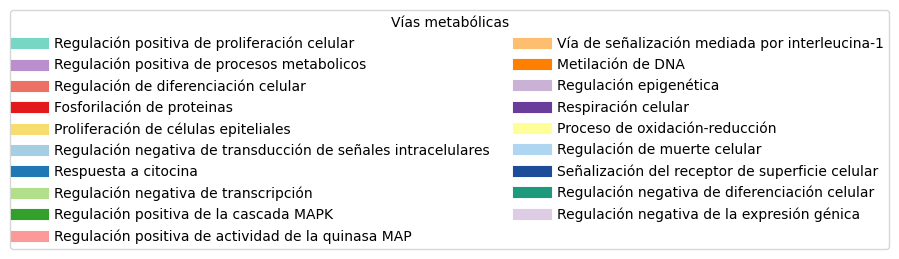

In [640]:
c = {
    'Regulación positiva de proliferación celular': '#76d7c4',
    'Regulación positiva de procesos metabolicos': '#bb8fce',
    'Regulación de diferenciación celular': '#ec7063',
    'Fosforilación de proteinas': '#d62728',
    'Proliferación de células epiteliales': '#f7dc6f',
    'Fosforilación de proteinas': '#1c9099',
    'Regulación negativa de transducción de señales intracelulares': '#a6cee3',
    'Respuesta a citocina':  '#1f78b4',
    'Regulación negativa de transcripción': '#b2df8a',
    'Regulación positiva de la cascada MAPK': '#33a02c',
    'Regulación positiva de actividad de la quinasa MAP': '#fb9a99',
    'Fosforilación de proteinas': '#e31a1c',
    'Vía de señalización mediada por interleucina-1':'#fdbf6f',
    'Metilación de DNA':'#ff7f00',
    'Regulación epigenética':'#cab2d6',
    'Respiración celular':'#6a3d9a',
    'Proceso de oxidación-reducción':'#ffff99',
    'Regulación de muerte celular':'#aed6f1',
    'Señalización del receptor de superficie celular':'#1d4c99',
    'Regulación negativa de diferenciación celular': '#1d997b',
    'Regulación negativa de la expresión génica':'#decbe4',
}

fig, ax = plt.subplots(figsize=(6, 2))

# Añadir una leyenda con los colores
for label, color in c.items():
    ax.plot([], [], label=label, color=color, linewidth=8)

# Crear la leyenda y añadir un título
legend = ax.legend(loc='center', ncol=2)
legend.set_title('Vías metabólicas')

ax.axis('off')

plt.tight_layout()
plt.savefig('../../Plots/leyendaVias.pdf',  bbox_inches='tight')

# Mostrar la figura
plt.show()

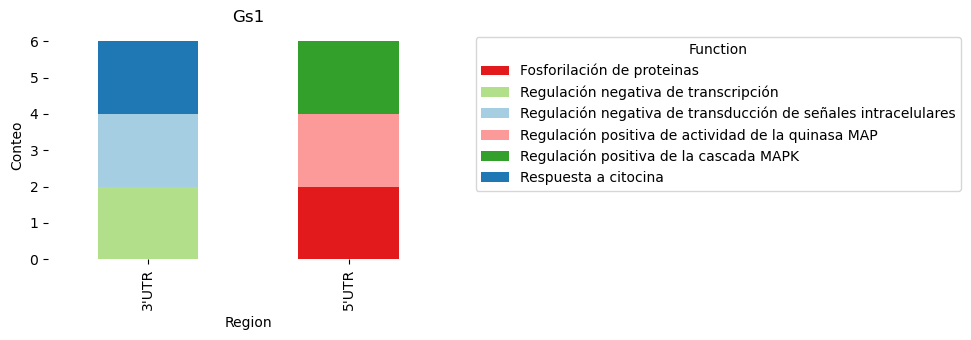

In [616]:
df_pivot = df_topsp_ug1.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Gs1')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGS1.pdf')
plt.show()

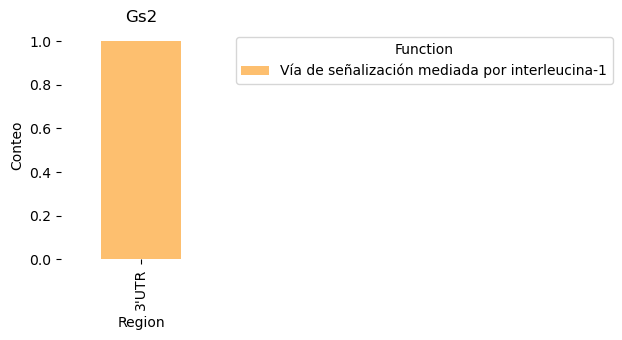

In [617]:
df_pivot = df_topsp_ug2.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(6.5, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Gs2')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGS2.pdf')
plt.show()

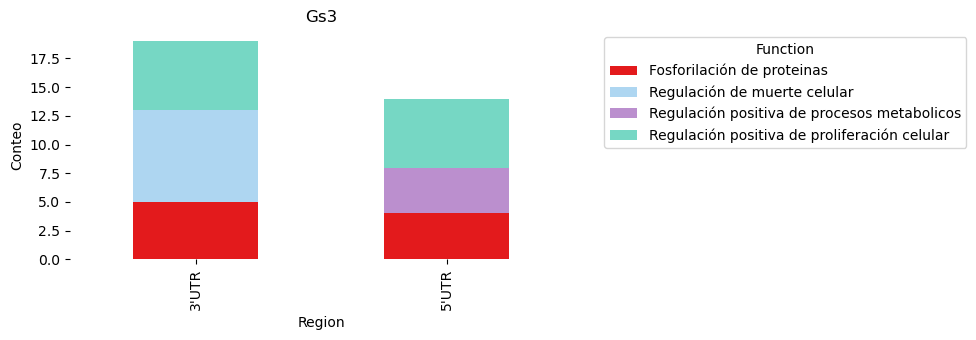

In [618]:
df_pivot = df_topsp_ug3.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Gs3')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGS3.pdf')
plt.show()

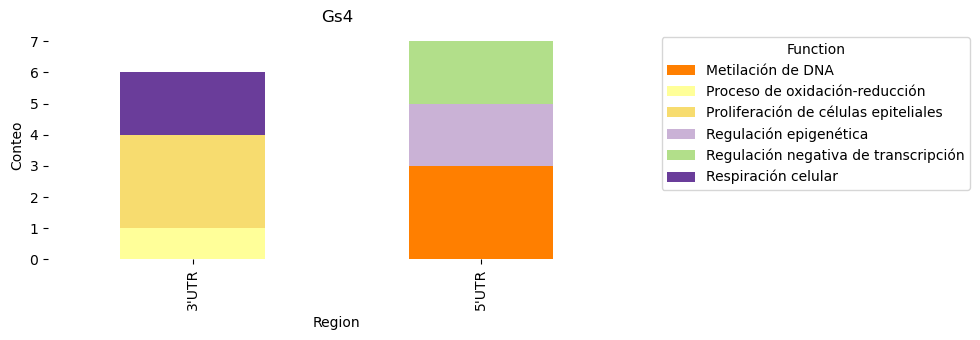

In [619]:
df_pivot = df_topsp_ug4.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Gs4')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGS4.pdf')
plt.show()

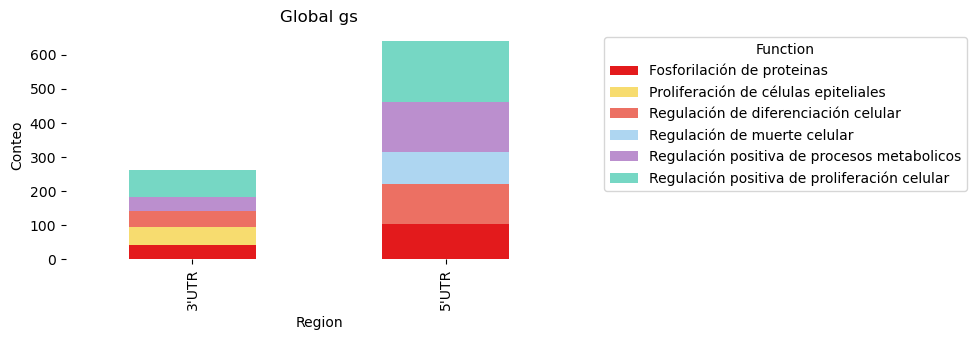

In [620]:
df_pivot = df_topsp_ugG.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Global gs')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGSG.pdf')
plt.show()

In [621]:
df.to_csv('../../Data/Estratos/miRNA_predichos_SpectrumEuler.tsv', sep = '\t', index = False)

In [622]:
g1 = list(dfgt[dfgt['Variant']=='Gst1']['miRNA'])
g2 = list(dfgt[dfgt['Variant']=='Gst2']['miRNA'])


eval = 0; contador = 0
for i in [g1, g2]:
    if len(i) > eval:
        print(f'{contador}', {len(i)})
        eval = len(i)
    contador +=1

g1 = g1 + ['NaN']*(eval - len(g1))

0 {8719}
1 {16131}


In [623]:
df = pd.DataFrame({
                   'miRNA_Estrato_0': g1,
                   'miRNA_Estrato_1': g2,
                  })
df

,miRNA_Estrato_0,miRNA_Estrato_1
0,hsa-miR-381-3p,hsa-miR-503-5p
1,hsa-miR-381-3p,hsa-miR-503-5p
2,hsa-miR-381-3p,hsa-miR-503-5p
3,hsa-miR-381-3p,hsa-miR-503-5p
4,hsa-miR-381-3p,hsa-miR-503-5p
...,...,...
16126,NaN,hsa-miR-497-5p
16127,NaN,hsa-miR-497-5p
16128,NaN,hsa-miR-1285-3p
16129,NaN,hsa-miR-1285-3p


In [624]:
ug1 = set(g1) - set(g2)
ug2 = set(g2) - set(g1)
ugG = set(g1) & set(g2)

print(f'{len(ug1)}, {len(ug2)}, {len(ugG)}')

14, 23, 62


In [625]:
dfgt_ug1 = dfgt[dfgt['miRNA'].isin(list(ug1))]
dfgt_ug1_count = pd.DataFrame(dfgt_ug1[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topgt_ug1 = dfgt_ug1_count.groupby(['Variant', 'Region']).head(5)
df_topgt_ug1

,function,Variant,Region,count
0,Regulación de muerte celular,Gst1,3'UTR,8
1,Regulación positiva de proliferación celular,Gst1,5'UTR,7
2,Regulación negativa de transcripción,Gst1,3'UTR,6
3,Regulación positiva de proliferación celular,Gst1,3'UTR,5
4,Regulación negativa de transcripción,Gst1,5'UTR,4
5,Regulación negativa de diferenciación celular,Gst1,3'UTR,4
6,Regulación negativa de transducción de señales...,Gst1,3'UTR,4
7,Regulación de diferenciación celular,Gst1,5'UTR,4
9,Metilación de DNA,Gst1,5'UTR,3
10,Regulación negativa de la expresión génica,Gst1,5'UTR,3


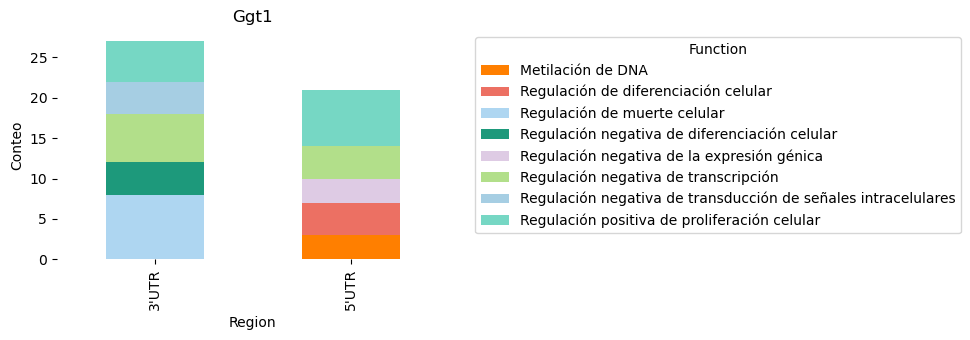

In [626]:
df_pivot = df_topgt_ug1.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Ggt1')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGT1.pdf')
plt.show()

In [627]:
dfgt_ug2 = dfgt[dfgt['miRNA'].isin(list(ug2))]
dfgt_ug2_count = pd.DataFrame(dfgt_ug2[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topgt_ug2 = dfgt_ug2_count.groupby(['Variant', 'Region']).head(5)
df_topgt_ug2

,function,Variant,Region,count
0,Regulación positiva de proliferación celular,Gst2,5'UTR,27
1,Regulación de muerte celular,Gst2,5'UTR,23
2,Regulación positiva de procesos metabolicos,Gst2,5'UTR,19
3,Proliferación de células epiteliales,Gst2,5'UTR,18
4,Regulación de muerte celular,Gst2,3'UTR,15
5,Regulación de diferenciación celular,Gst2,5'UTR,15
10,Regulación positiva de proliferación celular,Gst2,3'UTR,12
94,Regulación positiva de procesos metabolicos,Gst2,3'UTR,6
127,Regulación de diferenciación celular,Gst2,3'UTR,6
164,Señalización del receptor de superficie celular,Gst2,3'UTR,5


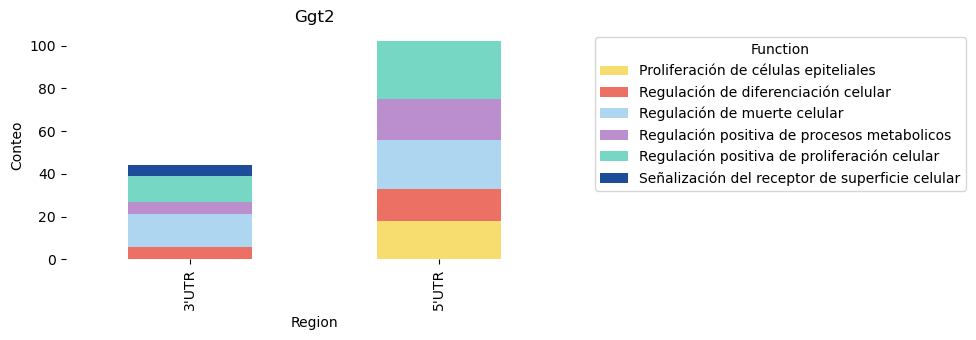

In [628]:
df_pivot = df_topgt_ug2.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Ggt2')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGT2.pdf')
plt.show()

In [629]:
dfgt_ugG = dfgt[dfgt['miRNA'].isin(list(ugG))]
dfgt_ugG_count = pd.DataFrame(dfgt_ugG[['function', 'Region']].value_counts()).reset_index()

df_topgt_ugG = dfgt_ugG_count.groupby(['Region']).head(5)
df_topgt_ugG

,function,Region,count
0,Regulación positiva de proliferación celular,5'UTR,108
1,Regulación positiva de procesos metabolicos,5'UTR,93
2,Regulación de diferenciación celular,5'UTR,69
3,Regulación de muerte celular,5'UTR,65
4,Fosforilación de proteinas,5'UTR,61
6,Regulación positiva de proliferación celular,3'UTR,43
14,Proliferación de células epiteliales,3'UTR,33
27,Regulación de diferenciación celular,3'UTR,29
38,Regulación positiva de procesos metabolicos,3'UTR,28
59,Regulación de muerte celular,3'UTR,24


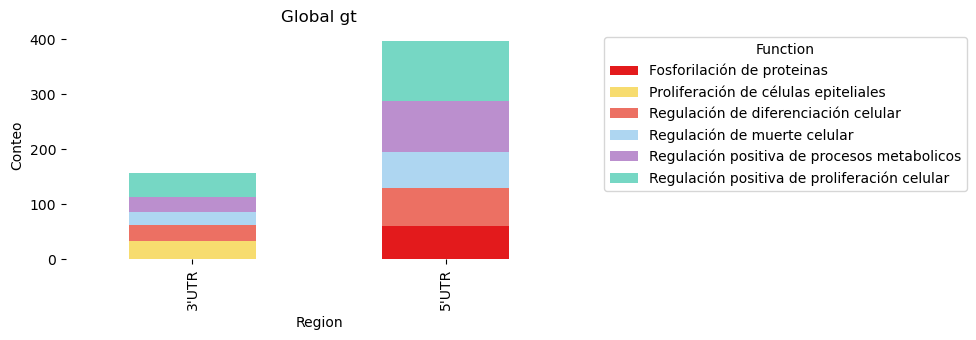

In [630]:
df_pivot = df_topgt_ugG.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Global gt')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGTG.pdf')
plt.show()

In [631]:
df.to_csv('../../Data/Estratos/miRNA_predichos_ConstantClustersEuler.tsv', sep = '\t', index = False)